## **California House Price**

### **Contents**

1. Business Problem Understanding
2. Data Understanding
3. Data Preprocessing
4. Modeling
5. Conclusion
6. Model Limitation
7. Recommendation

****

### **Business Problem Understanding**

**Context**

The price of houses in California is influenced by various factors, such as the location, size of the property, age of the building, and the surrounding environment. These factors can vary widely across different properties. The California real estate market is highly volatile, with price fluctuations driven by changes in supply and demand, as well as broader economic factors like interest rates and inflation. As a result, predicting the variation in property prices over time is a complex challenge.

By understanding the factors that influencing California house prices can help stakeholders such as developers, real estate agents, and financial institutions make more informed decisions. By accurately predicting property values, stakeholders can make better pricing choices, increase buyer confidence, and reduce financial risks in the real estate market.

**Problem Statement**

Accurate prediction of California house prices is crucial due to the state's volatile real estate market, influenced by factors like location, demand, and economic conditions. This helps homeowners, investors, and developers make informed decisions about buying, selling, and investing in properties. Financial institutions use price predictions to assess lending risks, while policymakers can plan for affordable housing and urban growth. In short, house price prediction enables stakeholders to reduce risks, optimize investments, and contribute to a stable housing market.

**Goals**

Based on the data provided, the goal is to develop a predictive tool that can accurately predict the median house value based on various property features such as location (longitude, latitude), housing characteristics (age, rooms, bedrooms, population, households), and economic factors (median income).

By utilizing these features, the tool can assist homeowners, real estate agents, and investors in determining the fair market value of a property. This can help sellers price their homes appropriately, buyers make informed decisions, and investors identify lucrative opportunities. Additionally, platforms offering such predictive tools can enhance user engagement and increase revenue by attracting more listings and transactions.

**Analytical Approach**

To predict house prices in California, the first step is to analyze the data to identify patterns that differentiate one property from another, based on various features such as location, building age, number of rooms, and the median income of the surrounding area.

Next, we will develop a regression model that can predict house prices based on these features. This model will help stakeholders, such as property developers, real estate agents, and homebuyers, obtain more accurate and reasonable price estimates.

With an accurate house price prediction model, stakeholders can make more informed decisions regarding property investments or sales, ultimately improving efficiency and reducing risks within the real estate industry.

**Metric Evaluation**

In house price prediction, the metric will using RMSE, MAE, and R² as evaluation metrics because they provide a comprehensive understanding of how well the model predicts property prices:

- **RMSE (Root Mean Squared Error):** RMSE is used because it penalizes larger errors more heavily due to the squaring of differences. In the context of house price prediction, larger errors can have significant financial consequences, and RMSE helps in identifying models that avoid these large errors. A lower RMSE indicates that the model's predictions are closer to the actual values.

- **MAE (Mean Absolute Error):** MAE is chosen to give a straightforward, interpretable measure of average prediction error. Unlike RMSE, MAE treats all errors equally, regardless of size. This makes it useful for understanding the general accuracy of predictions without being overly sensitive to outliers. It’s particularly helpful when we want to avoid giving excessive weight to large errors but still want to understand average performance.

- **R² (R-squared):** R² is important because it shows how well the model explains the variance in house prices based on the input features. In property price prediction, R² helps us assess whether the model is capturing the underlying factors (like location, size, etc.) that influence prices. A high R² value indicates that the model is successfully explaining most of the price variance, while a low R² suggests the model might not be adequately capturing the key relationships.

Together, these metrics offer a balanced view of a model's predictive performance, providing insights into both its accuracy and how well it fits the data.

### **Data Understanding**

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| longitude | Float | The geographic coordinate of the house (the higher the value, the further west the location). |
| latitude | Float | The geographic coordinate of the house (the higher the value, the further north the location). |
| housing_median_age  |  Float | 	The median age of the houses; the lower the value, the younger the houses in the area, and vice versa. |
| total_rooms | Float | The total number of rooms in houses within a particular block or neighborhood. |
| total_bedrooms | Float | 	The total number of bedrooms in houses within a particular block or neighborhood. |
| population | Float | 	The total number of people living in a particular block or neighborhood. |
| households | Float | The total number of households, groups of people living in a single home, within a block or neighborhood. |
| median_income | Float | 	The median income of households in a particular block (measured in tens of thousands of US Dollars). |
| ocean_proximity | Object | 	The proximity of the location to the coast/beach/ocean. |
| median_house_value | Float | The median value of homes within a block group. |


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import folium

import category_encoders as ce

import warnings
warnings.filterwarnings('ignore')

from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn.model_selection import KFold, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, mean_absolute_percentage_error, mean_squared_error, mean_absolute_error,  r2_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV


In [2]:
df = pd.read_csv("data_california_house.csv")
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


In [4]:
def check_df(df):
    result = []
    for col in df:
        n_missings = df[col].isnull().sum()
        n_unique = df[col].nunique()
        data_type = df[col].dtypes
        result.append([col, n_missings,n_unique,data_type])
    return pd.DataFrame(result, columns=['Feature', 'Missing Values', 'Unique Values', 'Data Type'])

check_df(df)

,Feature,Missing Values,Unique Values,Data Type
0,longitude,0,806,float64
1,latitude,0,836,float64
2,housing_median_age,0,52,float64
3,total_rooms,0,5227,float64
4,total_bedrooms,137,1748,float64
5,population,0,3498,float64
6,households,0,1649,float64
7,median_income,0,9797,float64
8,ocean_proximity,0,5,object
9,median_house_value,0,3548,float64


There are 137 missing entries out of 14.448 total rows, which amounts to about 0.95% of the data for this feature.

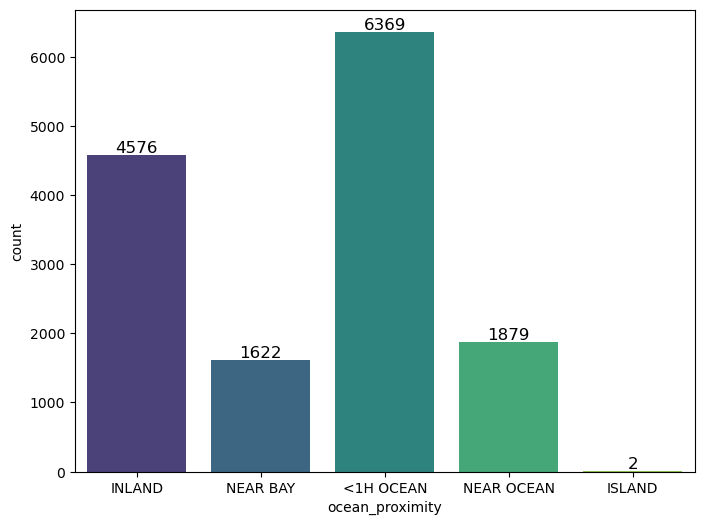

In [5]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=df, x="ocean_proximity", hue="ocean_proximity", palette="viridis", legend=False)

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', fontsize=12, color='black', 
                xytext=(0, 5), textcoords='offset points')

The "island" category only has 2 data points, while the other categories have over 1,500. This small amount of data isn't enough to provide meaningful insights and could cause the model to overfit. Therefore, it's better to drop this category for more accurate and stable predictions.

In [6]:
# Drop 'Island'
df = df[df['ocean_proximity'] != "ISLAND"]

The dataset has 0 duplicated value.

In [7]:
df.duplicated().sum()

0

## **Data Preprossessing**

### **Handling Missing Value with KNN Imputer**

KNN Imputer is a technique for filling in missing values in a dataset using the K-Nearest Neighbors (KNN) algorithm. This technique fills in missing values based on the values of the closest similar neighbors. KNN Imputer uses existing data to estimate the missing values, so the KNN imputer method is often more accurate than simple imputation methods like mean or median.

In [8]:
numeric_df = df.select_dtypes(include='number')

imputer = KNNImputer(n_neighbors=3)

df_imputed = pd.DataFrame (imputer.fit_transform(numeric_df),
                           columns=numeric_df.columns)

df.reset_index(drop=True, inplace=True)
df_imputed.reset_index(drop=True, inplace=True)

df_imputed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,59200.0


In [9]:
df_imputed['ocean_proximity'] = df['ocean_proximity']

df_imputed.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,47500.0,INLAND
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,100000.0,NEAR BAY
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,285800.0,<1H OCEAN
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,175000.0,<1H OCEAN
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,59200.0,INLAND


In [10]:
# Re-check after KNN Imputer
check_df(df_imputed)

,Feature,Missing Values,Unique Values,Data Type
0,longitude,0,806,float64
1,latitude,0,836,float64
2,housing_median_age,0,52,float64
3,total_rooms,0,5226,float64
4,total_bedrooms,0,1834,float64
5,population,0,3498,float64
6,households,0,1649,float64
7,median_income,0,9797,float64
8,median_house_value,0,3548,float64
9,ocean_proximity,0,4,object


Now, the number of missing values in all columns is 0. Next, we can visualize the distribution of values for each numeric column.

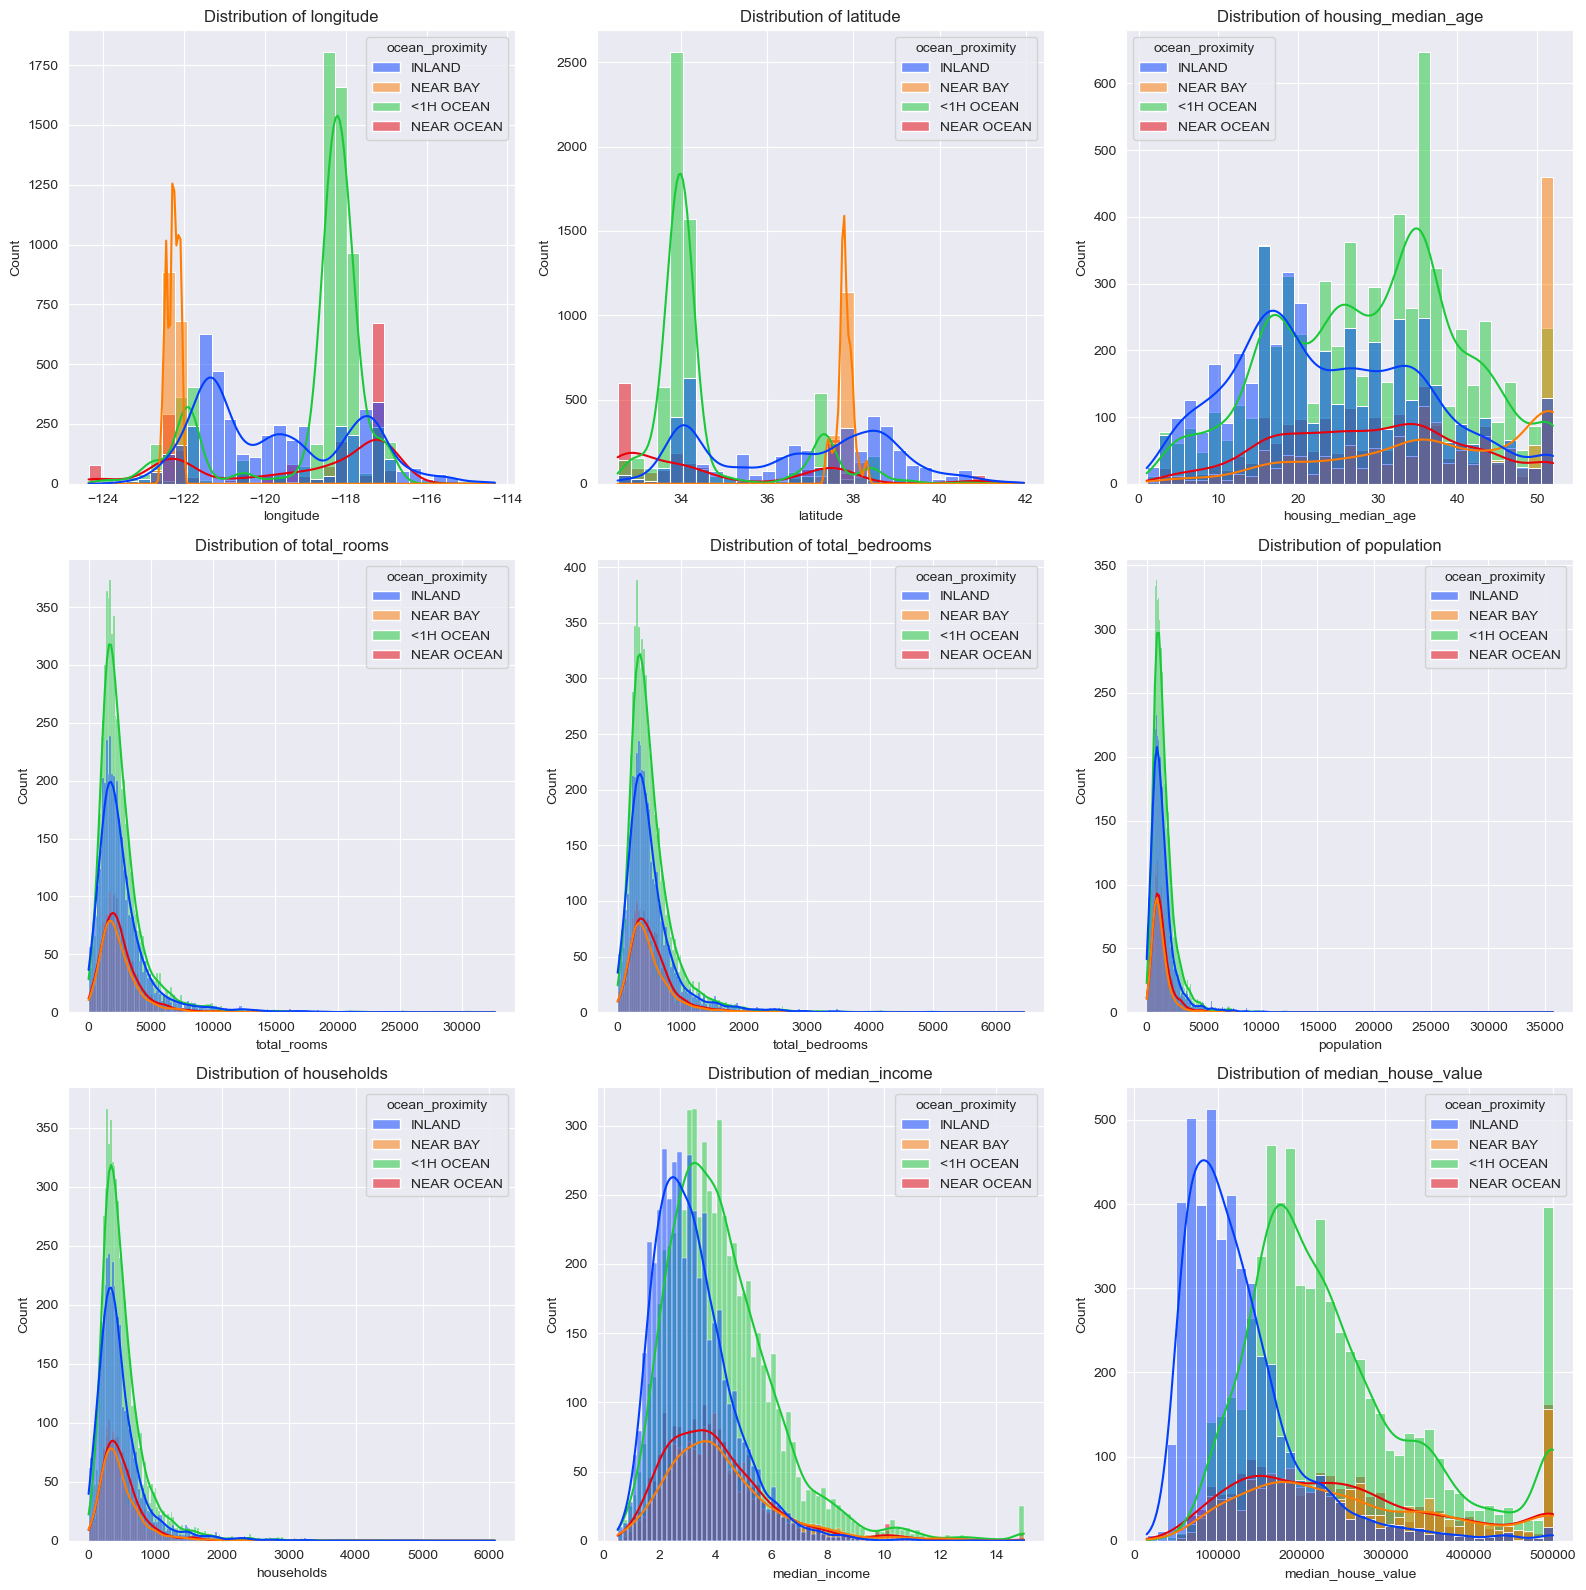

In [11]:
plt.figure(figsize=(16,16))
sns.set_style('darkgrid')

for i, col in enumerate(df_imputed.columns):
    if df_imputed[col].dtypes == 'float64':  
        plt.subplot(3, 3, (i + 1))  
        sns.histplot(df_imputed, x=col, hue='ocean_proximity', palette='bright', kde=True)  
        plt.title(f"Distribution of {col}")  

plt.tight_layout()

- The visualization shows that geographic proximity to the ocean significantly impacts the distribution of median_house_value and other characteristics. Areas closer to the coast (NEAR OCEAN, NEAR BAY) generally have higher median_house_value and median_income.

- INLAND areas exhibit more variation, including regions with very high values for population, total_rooms, and total_bedrooms.

- Building age ranges from 0 to 50 years, with many houses aged between 20 and 30 years. The peak at 50 years indicates older buildings, likely because the dataset is based on the 1990 census.

- median_income shows a distribution closer to normal but slightly skewed to the right. Most households earn below $60,000, with a few outliers exceeding $100,000. This is reasonable given the wealth of California.

- Skewed distributions in variables like total_rooms, total_bedrooms, population, and households suggest significant outliers that require special handling.

- The similar distribution patterns of total_rooms, total_bedrooms, population, and households indicate strong correlations among these variables.

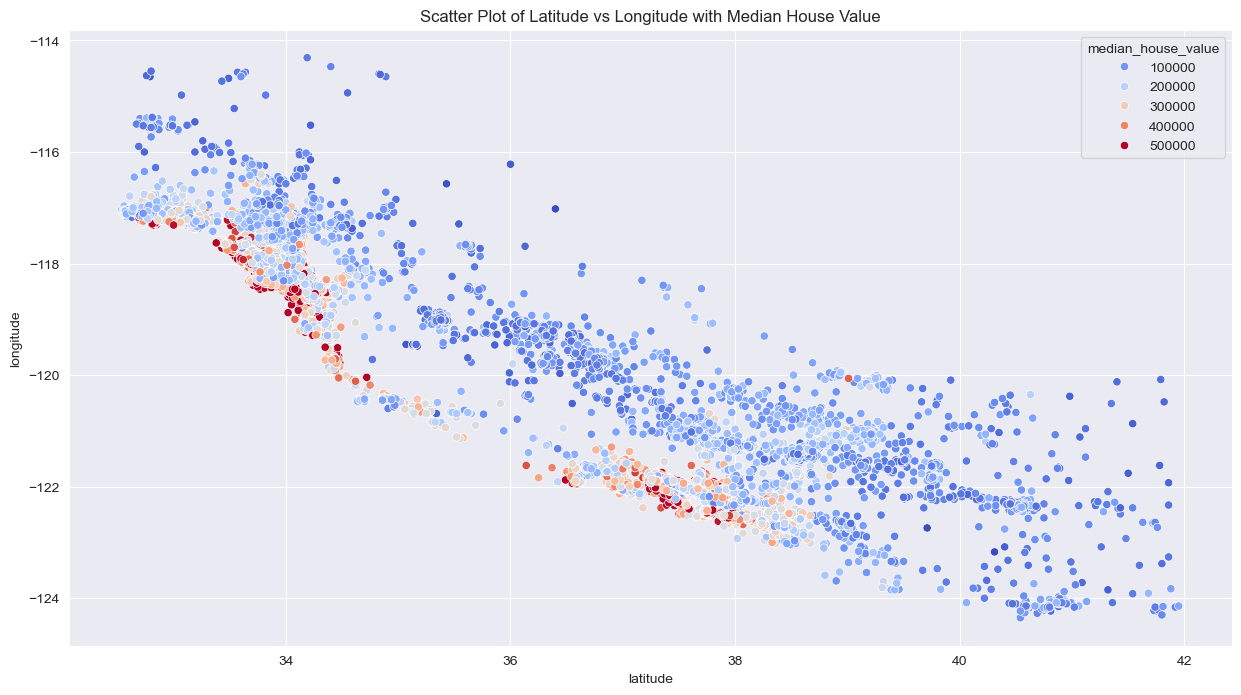

In [12]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x="latitude", y="longitude", data=df_imputed, hue="median_house_value", palette="coolwarm")
plt.title("Scatter Plot of Latitude vs Longitude with Median House Value")
plt.show()

This scatterplot shows the geographic distribution of median house values, with latitude on the x-axis and longitude on the y-axis. Each point represents a location, and the color indicates the median house value: blue for lower values (around $100,000), transitioning to light blue, orange, and red for higher values (up to $500,000). The plot reveals clusters of higher house values (red points) around specific areas, likely urban or desirable regions, while lower values (blue) are more widespread. This suggests a geographic trend where expensive houses are concentrated in certain locations, possibly reflecting urban centers or areas with higher demand.

For better visualization, here is the view using Folium for California housing data:

In [13]:
min_price = df_imputed['median_house_value'].min()
max_price = df_imputed['median_house_value'].max()

colormap = plt.get_cmap('coolwarm')

latitude_center = df_imputed['latitude'].mean()
longitude_center = df_imputed['longitude'].mean()

california_map = folium.Map(location=[latitude_center, longitude_center], zoom_start=6)

sampled_df = df_imputed.sample(frac=0.1, random_state=42)

for _, row in sampled_df.iterrows():
    norm_price = (row['median_house_value'] - min_price) / (max_price - min_price)
    color = mcolors.to_hex(colormap(norm_price))
    
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7
    ).add_to(california_map)

california_map

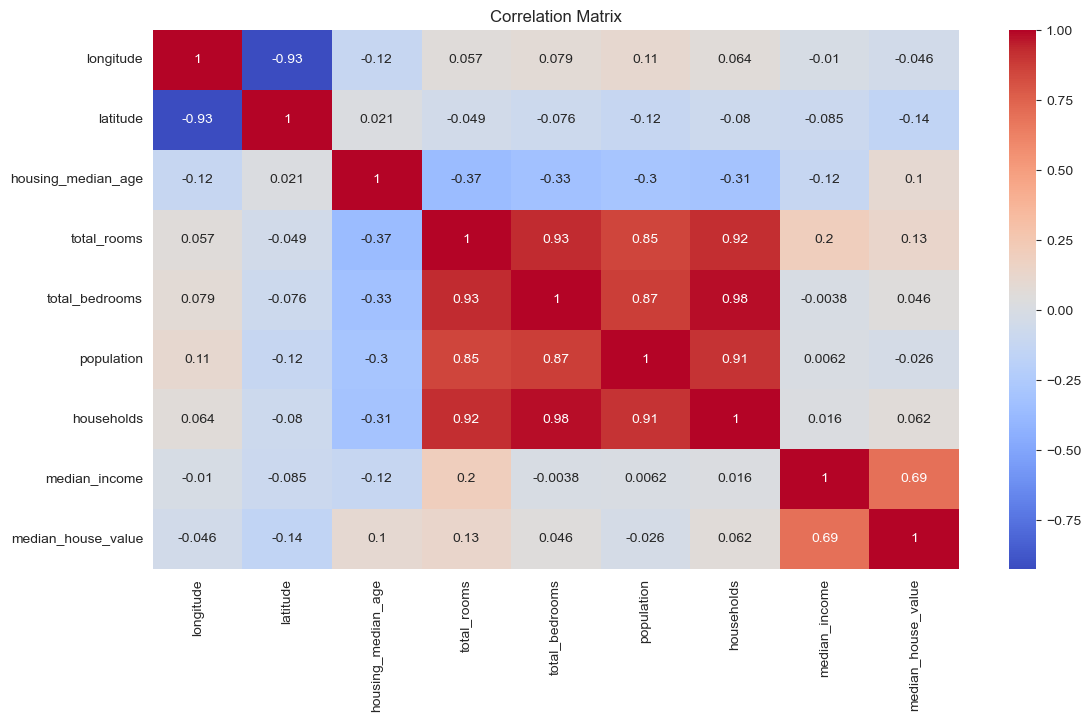

In [14]:
# Correlation matrix for numerical columns only

correlation_matrix = df_imputed.select_dtypes(include=["float64"]).corr()

plt.figure(figsize=(13, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

This correlation matrix shows the relationships between numerical variables, with values ranging from -1 (strong negative correlation) to 1 (strong positive correlation). Key observations include:

- Latitude and Longitude: Strong negative correlation (-0.93), indicating a geographic trend.
- Total Rooms, Bedrooms, Population, and Households: Highly correlated (above 0.85), suggesting areas with more rooms tend to have larger populations and households.
- Median Income and Median House Value: Moderate positive correlation (0.69), showing higher incomes are linked to higher house prices.
- Housing Median Age: Weak correlations with other variables, indicating limited influence.
- Median House Value: Slight negative correlation with latitude and longitude, suggesting some geographic influence on house prices.

Overall, median income stands out as the strongest predictor of house value, while room and population-related features are closely related to each other.

### **Handling Outliers with Three Sigma Rules**

Using boxplots to identify outliers in the data across the 4 ocean proximity categories.

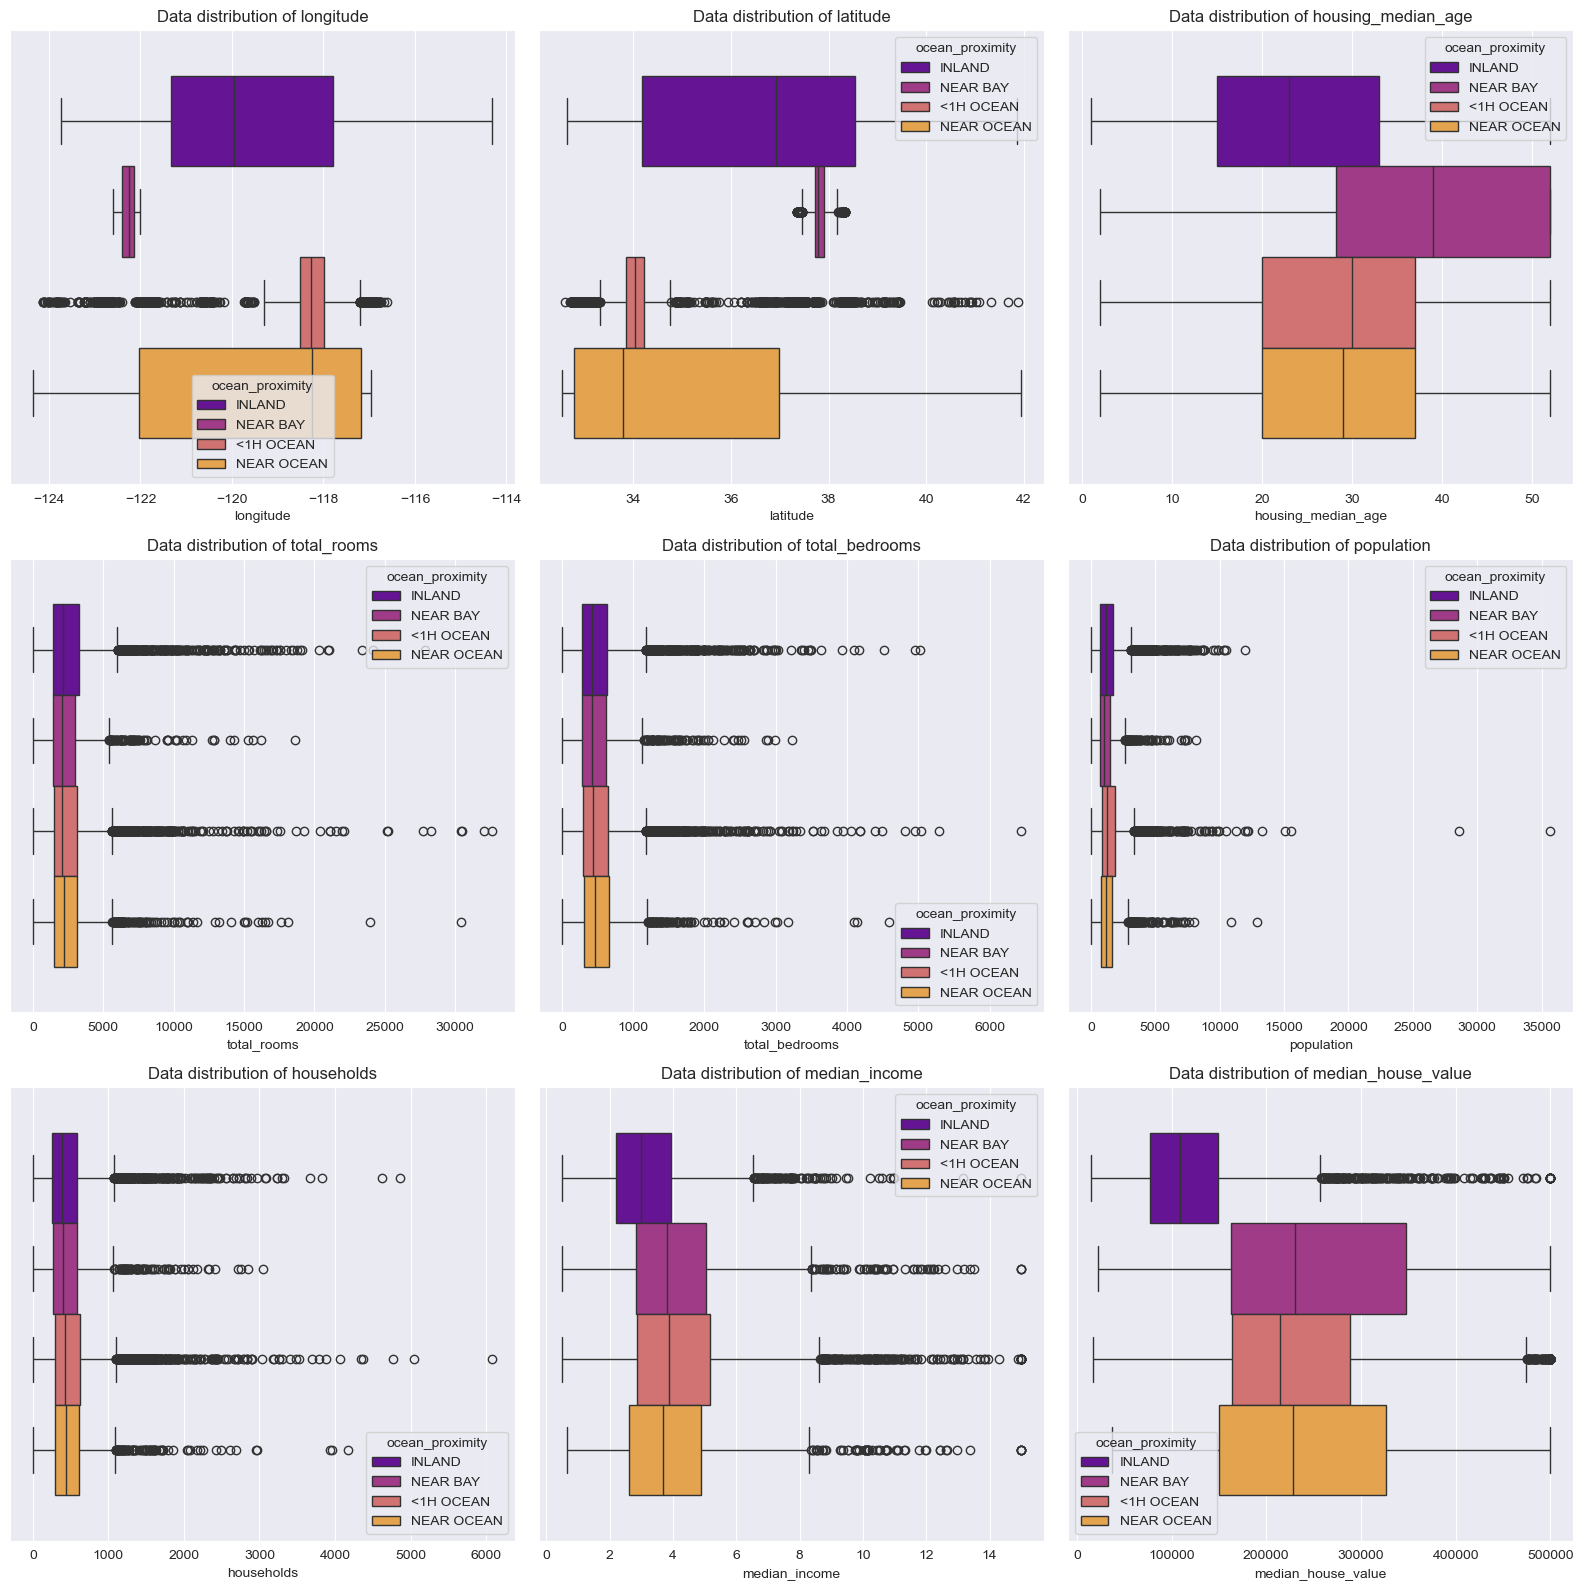

In [15]:
plt.figure(figsize=(16,16))
sns.set_style('darkgrid')

for i, col in enumerate(df_imputed.columns):
    if df_imputed[col].dtypes == 'float64':  
        plt.subplot(3, 3, (i + 1))  
        sns.boxplot(df_imputed, x=col, hue='ocean_proximity', palette='plasma')  
        plt.title(f"Data distribution of {col}")  

plt.tight_layout()

By using the three-sigma rule, I focused on removing only extreme outliers that fall beyond 3 standard deviations from the mean. This approach helps retain most of the data while reducing the impact of extreme values, making it less aggressive compared to other methods like IQR.

In [16]:
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=['float64']).columns
    df_no_outliers = df.copy()
    
    for col in numeric_cols:
        mean = df[col].mean()
        std_dev = df[col].std()
        
        lower_bound = mean - 3 * std_dev
        upper_bound = mean + 3 * std_dev
        
        df_no_outliers = df_no_outliers[(df_no_outliers[col] >= lower_bound) & (df_no_outliers[col] <= upper_bound)]
    
    return df_no_outliers

df_no_outliers = remove_outliers(df_imputed)
df_no_outliers.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,47500.0,INLAND
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,100000.0,NEAR BAY
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,285800.0,<1H OCEAN
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,175000.0,<1H OCEAN
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,59200.0,INLAND


In [17]:
check_df(df_no_outliers)

,Feature,Missing Values,Unique Values,Data Type
0,longitude,0,797,float64
1,latitude,0,832,float64
2,housing_median_age,0,52,float64
3,total_rooms,0,4810,float64
4,total_bedrooms,0,1530,float64
5,population,0,3138,float64
6,households,0,1354,float64
7,median_income,0,9279,float64
8,median_house_value,0,3503,float64
9,ocean_proximity,0,4,object


In [18]:
print("Shape before removing the outlier:", df_imputed.shape)
print("Shape after removing the outlier:", df_no_outliers.shape)

Shape before removing the outlier: (14446, 10)
Shape after removing the outlier: (13808, 10)


The shape of the data before removing outliers was 14,446 rows. After applying the three-sigma rule to remove outliers, the shape became 13808 rows, indicating that 638 rows (outliers) were removed. This shows that only a small portion of the data was affected, ensuring most of the data was preserved while reducing the influence of extreme values.

### **Feature Engineering**

To address the high correlations among certain features, I created new features to extract more meaningful insights:

- rooms_per_household: Calculated as total rooms divided by households, representing the average number of rooms per household.
- population_per_household: Calculated as population divided by households, showing the average number of people per household.
- bedrooms_per_room: Calculated as total bedrooms divided by total rooms, providing the proportion of bedrooms relative to the total number of rooms.

These new features help reduce redundancy and provide more informative metrics for analysis, particularly when dealing with highly correlated variables.

In [19]:
df_no_outliers = df_no_outliers.copy()

In [20]:
# Create new features
df_no_outliers['rooms_per_household'] = df_no_outliers['total_rooms'] / df_no_outliers['households']
df_no_outliers['population_per_household'] = df_no_outliers['population'] / df_no_outliers['households']
df_no_outliers['bedrooms_per_room'] = df_no_outliers['total_bedrooms'] / df_no_outliers['total_rooms']

In [21]:
df_no_outliers.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,47500.0,INLAND,2.800000,4.825000,0.250000
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,100000.0,NEAR BAY,3.671480,3.018051,0.322517
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,285800.0,<1H OCEAN,6.478022,3.810440,0.167939
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,175000.0,<1H OCEAN,2.518000,3.051000,0.474980
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,59200.0,INLAND,4.622754,3.628743,0.251295


In [22]:
df_no_ocean = df_no_outliers.drop(columns=['total_rooms', 'total_bedrooms', 'households', 'longitude', 'latitude'])

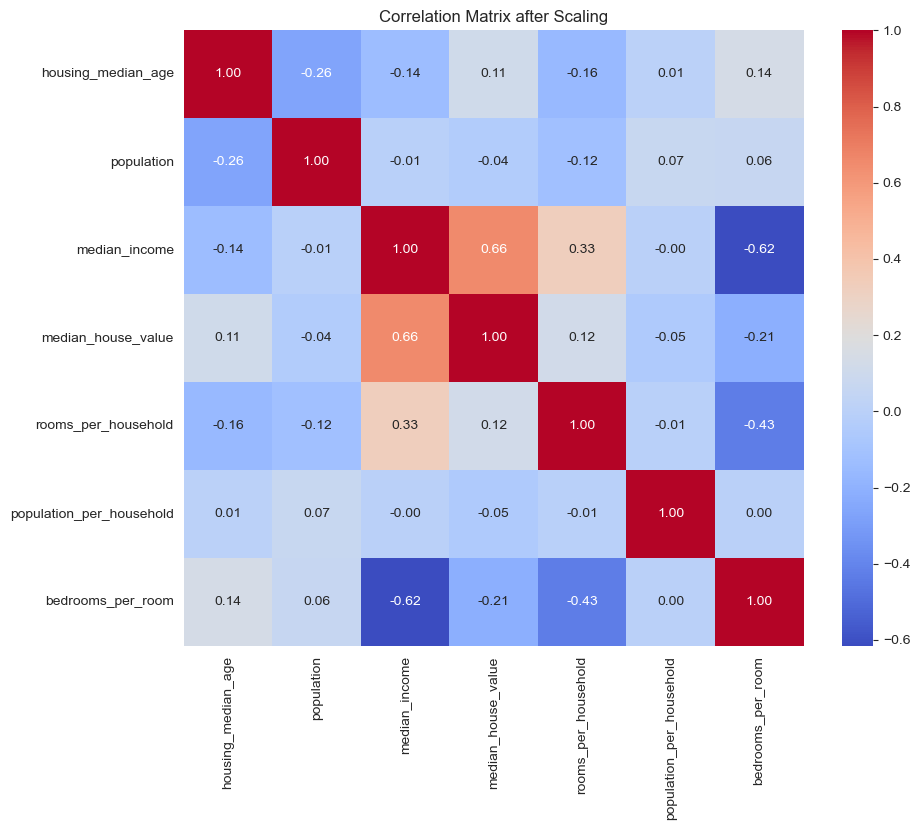

In [23]:
df_no_ocean_num = df_no_ocean.select_dtypes(include=[np.number])

plt.figure(figsize=(10, 8))
sns.heatmap(df_no_ocean_num.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix after Scaling")
plt.show()


This is the correlation matrix result after adding the new features to provides more refined insights into the relationships between variables.

- Median Income and Median House Value still show a strong positive correlation (0.66), indicating that higher income is associated with higher house prices.
- Rooms per Household has a moderate positive correlation with Median Income (0.33), suggesting that areas with higher income may have slightly more rooms per household. However, it has a negative correlation with Bedrooms per Room (-0.43), indicating that as the number of rooms per household increases, the ratio of bedrooms to rooms tends to decrease.
- Bedrooms per Room now shows a strong negative correlation with Median Income (-0.62) and a slight negative correlation with Median House Value (-0.21), suggesting that areas with more bedrooms per room tend to have lower income and house values.
Population per Household shows weaker correlations with other features, indicating that the average number of people per household does not strongly correlate with other variables, except a slight negative correlation with Bedrooms per Room (-0.43).

### **Clean Dataset**

After handling missing values, outliers, and creating new features, this is the cleaned dataset that will be used for the model.

In [24]:
df_model = df_no_ocean.copy()
df_model.head()

,housing_median_age,population,median_income,median_house_value,ocean_proximity,rooms_per_household,population_per_household,bedrooms_per_room
0,52.0,193.0,1.9750,47500.0,INLAND,2.800000,4.825000,0.250000
1,43.0,836.0,2.2604,100000.0,NEAR BAY,3.671480,3.018051,0.322517
2,17.0,1387.0,6.2990,285800.0,<1H OCEAN,6.478022,3.810440,0.167939
3,17.0,3051.0,1.7199,175000.0,<1H OCEAN,2.518000,3.051000,0.474980
4,50.0,606.0,2.2206,59200.0,INLAND,4.622754,3.628743,0.251295


In [25]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13808 entries, 0 to 14445
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   housing_median_age        13808 non-null  float64
 1   population                13808 non-null  float64
 2   median_income             13808 non-null  float64
 3   median_house_value        13808 non-null  float64
 4   ocean_proximity           13808 non-null  object 
 5   rooms_per_household       13808 non-null  float64
 6   population_per_household  13808 non-null  float64
 7   bedrooms_per_room         13808 non-null  float64
dtypes: float64(7), object(1)
memory usage: 970.9+ KB


In [26]:
check_df(df_model)

,Feature,Missing Values,Unique Values,Data Type
0,housing_median_age,0,52,float64
1,population,0,3138,float64
2,median_income,0,9279,float64
3,median_house_value,0,3503,float64
4,ocean_proximity,0,4,object
5,rooms_per_household,0,13171,float64
6,population_per_household,0,12896,float64
7,bedrooms_per_room,0,13190,float64


The new dataset after preprocessing contains 13,808 entries and 8 columns, down from the original 14,448 entries and 10 columns. It is now clean, with no missing values and outliers removed. Additionally, new features have been created to enhance the analysis and improve the model's performance.

## **Modeling**


In [90]:
# Define preprocessing steps
preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), ['ocean_proximity']), 
    ('scaler', StandardScaler(), ['median_income', 'housing_median_age', 
                                   'rooms_per_household', 'population_per_household', 
                                   'bedrooms_per_room', 'population'])
], remainder='passthrough') 


In [91]:
#Define features and target
X = df_model.drop('median_house_value', axis=1)
y = df_model['median_house_value']

In [92]:
# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **Machine Learning Models**

In this model, the goal is to predict California house prices (median_house_value) using various features. I applied multiple algorithms to identify the best model for this regression task. Here's a brief explanation of why each algorithm was used:

**1. Linear Regression**

Linear regression models the relationship between the target variable and features by fitting a linear equation. It’s simple, interpretable, and a good starting point for regression tasks. Linear regression assumes a linear relationship between the input features and the target. It finds the line that minimizes the sum of squared errors between predicted and actual values.

**2. Ridge Regression**

Ridge regression is an extension of linear regression with regularization, which helps handle multicollinearity (high correlation between features) in the data. It adds a penalty term to the loss function to shrink the model's coefficients, improving generalization and reducing overfitting. The regularization strength is controlled by a parameter (λ).

**3. Random Forest Regressor**

Random Forest is an ensemble method that combines multiple decision trees. It is great for capturing complex, non-linear relationships in the data and reduces the risk of overfitting compared to a single decision tree. The model builds multiple trees with different subsets of data and features, and the final prediction is the average of all trees’ predictions.

**4. Gradient Boosting Regressor**

Gradient Boosting builds decision trees sequentially, where each tree corrects the errors made by the previous one. This method is powerful for handling complex data patterns and provides high accuracy. The model uses gradient descent to iteratively reduce the residual error, improving predictions over time.

**5. XGBoost Regressor**

XGBoost is an advanced version of Gradient Boosting that focuses on performance and speed. It’s known for high accuracy and efficiency, especially with large datasets. XGBoost includes regularization, handles missing values, and leverages parallelization for faster computation, making it a powerful model for predicting house prices.



In [93]:
# Define model algorithm
lr = LinearRegression()
rg = Ridge(alpha=1.0)
rf = RandomForestRegressor(n_estimators=100, random_state=42)
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
xgb = XGBRegressor(n_estimators=100, random_state=42)

# Models with logarithmic transformation
log_lr = TransformedTargetRegressor(lr, func=np.log, inverse_func=np.exp)
log_rg = TransformedTargetRegressor(rg, func=np.log, inverse_func=np.exp)
log_rf = TransformedTargetRegressor(rf, func=np.log, inverse_func=np.exp)
log_gb = TransformedTargetRegressor(gb, func=np.log, inverse_func=np.exp)
log_xgb = TransformedTargetRegressor(xgb, func=np.log, inverse_func=np.exp)

# Scaling data
scaler = StandardScaler()

# Algorithms candidates
models = [log_lr, log_rg, log_rf, log_gb, log_xgb]

score_rmse = []
score_mean_rmse = []
score_std_rmse = []

score_mae = []
score_mean_mae = []
score_std_mae = []

score_r2 = []
score_mean_r2 = []
score_std_r2 = []


#Find best algorithm based on matrics
for i in models:
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', preprocessor),
        ('scaler', scaler),
        ('model', i)
    ])   

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )
    print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    score_mean_rmse.append(model_cv_rmse.mean())
    score_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )
    print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    score_mean_mae.append(model_cv_mae.mean())
    score_std_mae.append(model_cv_mae.std())

    # R²
    model_cv_r2 = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )
    print(model_cv_r2, i)

    score_r2.append(model_cv_r2)
    score_mean_r2.append(model_cv_r2.mean())
    score_std_r2.append(model_cv_r2.std())




[-73846.93735291 -74762.57891455 -69147.4371895  -73047.73994139
 -76833.80373459] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-50990.04670734 -51218.99492866 -47700.50302203 -50326.89701009
 -52525.43223964] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-0.27297539 -0.26932248 -0.24435853 -0.26587326 -0.27666562] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=LinearRegression())
[-73844.36734749 -74758.31092429 -69145.20431843 -73045.55587668
 -76830.2403795 ] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
                           regressor=Ridge())
[-50988.63920698 -51216.9066537  -47699.06337616 -50325.8555061
 -52523.73669281] TransformedTargetRegressor(func=<ufunc 'log'>, inverse_func=<ufunc 'exp'>,
               

In [94]:
# Algorithm candidates score

pd.DataFrame({
    'Model': ['Linear Regression', 'Ridge','Random Forest Regressor', 'Gradient Boosting', 'XGBoost Regressor'],
    'Mean_RMSE': score_mean_rmse,
    'Std_RMSE': score_std_rmse,
    'Mean_MAE': score_mean_mae,
    'Std_MAE': score_std_mae,
    'Mean_R²': score_mean_r2,
    'Std_R²': score_std_r2,
})

,Model,Mean_RMSE,Std_RMSE,Mean_MAE,Std_MAE,Mean_R²,Std_R²
0,Linear Regression,-73527.699427,2528.803048,-50552.374782,1594.547436,-0.265839,0.011329
1,Ridge,-73524.735769,2528.246105,-50550.840287,1594.420411,-0.265839,0.011328
2,Random Forest Regressor,-60144.446547,1893.573990,-40897.893370,1072.023270,-0.223175,0.006553
3,Gradient Boosting,-61548.845465,2008.836672,-42182.718385,1230.063583,-0.229435,0.007516
4,XGBoost Regressor,-61881.517496,1464.607945,-42139.232961,786.665644,-0.231090,0.004477


Random Forest performs the best in terms of both mean RMSE and MAE, indicating that it has the smallest average errors and is more consistent in its predictions. XGBoost performs similarly to Random Forest but with slightly higher mean MAE and RMSE values. On the other hand, Linear Regression and Ridge exhibit larger errors (higher RMSE and MAE) and negative R² values, suggesting that these models do not fit the data well. Overall, based on its lower error rates and consistent performance, Random Forest appears to be the most reliable model for this task.

**Predict Test Set with Benchmark Model**

In [95]:
# Define models for comparison
models = {
    'LinearRegression' : LinearRegression(),
    'Ridge' : Ridge(alpha=1.0),
    'RandomForest' : RandomForestRegressor(random_state=42),
    'GradientBoosting' : GradientBoostingRegressor(random_state=42),
    'XGBoost' : XGBRegressor(random_state=42)
}

score_rmse = []
score_mae = []
score_r2 = []

# Test prediction
for i in models:

    model = Pipeline([
        ('preprocessing', preprocessor),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_r2.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'R²': score_r2}, index=models.keys())
score_before_tuning

,RMSE,MAE,R²
LinearRegression,72881.496251,53153.571941,0.308749
Ridge,72880.989456,53153.614257,0.308750
RandomForest,61032.985464,43331.777795,0.247241
GradientBoosting,61630.377644,44162.604680,0.252128
XGBoost,62284.301377,44016.331997,0.248298


The results of the model evaluation show the following metrics for each model:

- Linear Regression and Ridge have very similar performance, with slightly higher RMSE and MAE values compared to the other models. This suggests that these models are less effective at predicting the target variable and have larger prediction errors. The R² values for both are low (around 0.31), indicating that the models do not fit the data well and are not explaining much of the variance in the target variable.

- Random Forest performs better than Linear Regression and Ridge, with lower RMSE (61032) and MAE (43331). However, its R² value (0.247) is still relatively low, suggesting that while it performs better, it still doesn’t explain a significant portion of the variance in the data.

- Gradient Boosting and XGBoost show similar performance to Random Forest, with slightly higher RMSE and MAE values but still performing better than Linear Regression and Ridge. Their R² values are also low (around 0.25 to 0.26), indicating room for improvement.

In summary, **Random Forest performs the best in terms of RMSE and MAE**, but all models are struggling to explain a significant amount of the variance in the data (with R² values under 0.31). These results suggest that more advanced feature engineering or hyperparameter tuning may be necessary to improve model performance.

## Hyperparameter Tuning

Since the Random Forest model performs slightly better than the other models, we will proceed with using Random Forest as the final model. At this stage, we will perform hyperparameter tuning on the Random Forest model in the hope of improving its performance.

In [96]:
# Model Training and Evaluation (with pipeline)
pipeline = Pipeline([
    ('transformer', preprocessor), 
    ('model', RandomForestRegressor(random_state=42))  
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

# Calculate performance metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"M²: {r2:.2f}")

RMSE: 61032.99
MAE: 43331.78
M²: 0.69


In [97]:
# Define the parameter distribution
param_dist = {
    'model__n_estimators': [100, 200, 300, 500],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__bootstrap': [True, False]
}

scoring = {
    'neg_mean_absolute_error': 'neg_mean_absolute_error',
    'neg_root_mean_squared_error': make_scorer(mean_squared_error, squared=False, greater_is_better=False),
    'neg_mean_absolute_percentage_error': make_scorer(mean_absolute_percentage_error, greater_is_better=False)
}


# Define RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=pipeline, 
    param_distributions=param_dist,
    n_iter=50,  
    scoring='neg_mean_absolute_error',  
    cv=5,
    verbose=2,
    random_state=42,  
    n_jobs=-1 
)

In [98]:
# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first'),
                                                                               ['ocean_proximity']),
                                                                              ('scaler',
                                                                               StandardScaler(),
                                                                               ['median_income',
                                                                                'housing_median_age',
                                                                                'rooms_per_household',
                                                                                'population_per_household',
                                                                                'bedrooms_per_room',
                                                                                'population'])])),
                                             ('model',
                                              RandomFor...essor(random_state=42))]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__bootstrap': [True, False],
                                        'model__max_depth': [10, 20, 30, None],
                                        'model__max_features': ['auto', 'sqrt',
                                                                'log2'],
                                        'model__min_samples_leaf': [1, 2, 4],
                                        'model__min_samples_split': [2, 5, 10],
                                        'model__n_estimators': [100, 200, 300,
                                                                500]},
                   random_state=42, scoring='neg_mean_absolute_error',
                   verbose=2)

In [99]:
# Best hyperparameters and model
print("Best Hyperparameters:", random_search.best_params_)
best_rf_model = random_search.best_estimator_

Best Hyperparameters: {'model__n_estimators': 500, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_features': 'log2', 'model__max_depth': None, 'model__bootstrap': True}


In [100]:
# Evaluate on Test Data
y_pred = best_rf_model.predict(X_test)
test_mae = mean_absolute_error(y_test, y_pred)
test_rmse = mean_squared_error(y_test, y_pred, squared=False)

print("Test MAE:", test_mae)
print("Test RMSE:", test_rmse)

Test MAE: 42622.04817181486
Test RMSE: 59652.2032871529


In [101]:
# Convert cv_results_ to a DataFrame
results_df = pd.DataFrame(random_search.cv_results_)

# Display the first few rows of the DataFrame
results_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_model__bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,14.902347,0.500173,0.360651,0.055466,300,5,2,log2,20,True,"{'model__n_estimators': 300, 'model__min_sampl...",-41112.382930,-42683.300016,-40279.228921,-40808.911652,-41822.225448,-41341.209794,836.192399,6
1,9.870242,0.442290,0.147440,0.009378,100,2,1,log2,30,False,"{'model__n_estimators': 100, 'model__min_sampl...",-41119.915526,-43198.117767,-40905.891211,-41006.256507,-42561.003292,-41758.236861,939.905597,27
2,35.040244,1.365048,0.646354,0.160917,500,10,2,log2,20,False,"{'model__n_estimators': 500, 'model__min_sampl...",-40986.576202,-42591.764747,-40398.838930,-40681.866003,-41875.078044,-41306.824785,811.363472,4
3,8.924854,0.263646,0.197000,0.013234,200,10,2,log2,30,True,"{'model__n_estimators': 200, 'model__min_sampl...",-41136.540464,-42848.692866,-40161.016821,-40740.552244,-42029.206004,-41383.201680,952.109435,13
4,0.022734,0.005703,0.000000,0.000000,500,10,2,auto,10,True,"{'model__n_estimators': 500, 'model__min_sampl...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,36


In [102]:
print('Random Forest')
print('Best_score:', random_search.best_score_)
print('Best_params:', random_search.best_params_)

Random Forest
Best_score: -41300.94221893597
Best_params: {'model__n_estimators': 500, 'model__min_samples_split': 2, 'model__min_samples_leaf': 2, 'model__max_features': 'log2', 'model__max_depth': None, 'model__bootstrap': True}


**Predict to Test Set with the Tuned Model**

In [103]:
# Define model Random Forest (same as before)
model = {'RandomForest': RandomForestRegressor(random_state=42)}

# Define model with the best estimator from RandomizedSearchCV for Random Forest
rf_tuning = random_search.best_estimator_

# Fitting the model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Save RMSE, MAE, and R² metrics after tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
r2_rf_tuning = r2_score(y_test, y_pred_rf_tuning)

# Create a DataFrame with the metrics after tuning
score_after_tuning_rf = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'R²': r2_rf_tuning}, index=model.keys())

# Display the results
score_after_tuning_rf


,RMSE,MAE,R²
RandomForest,59652.203287,42622.048172,0.707341


**Performance Comparison**

In [104]:
# Before hyperparameter tuning
pd.DataFrame(score_before_tuning.loc['RandomForest']).T

,RMSE,MAE,R²
RandomForest,61032.985464,43331.777795,0.247241


In [105]:
# Before hyperparameter tuning
score_after_tuning_rf

,RMSE,MAE,R²
RandomForest,59652.203287,42622.048172,0.707341


After hyperparameter tuning, the Random Forest model shows a significant improvement in performance. The RMSE decreased from 61032.98 to 59652.20, and the MAE decreased from 43331.77 to 42622.04, indicating smaller and more accurate prediction errors. Additionally, the R² score increased substantially from 0.247 to 0.707, demonstrating that the tuned model can now explain a much larger portion of the data's variance. These improvements highlight the effectiveness of hyperparameter tuning in enhancing the model's predictive accuracy and overall reliability.

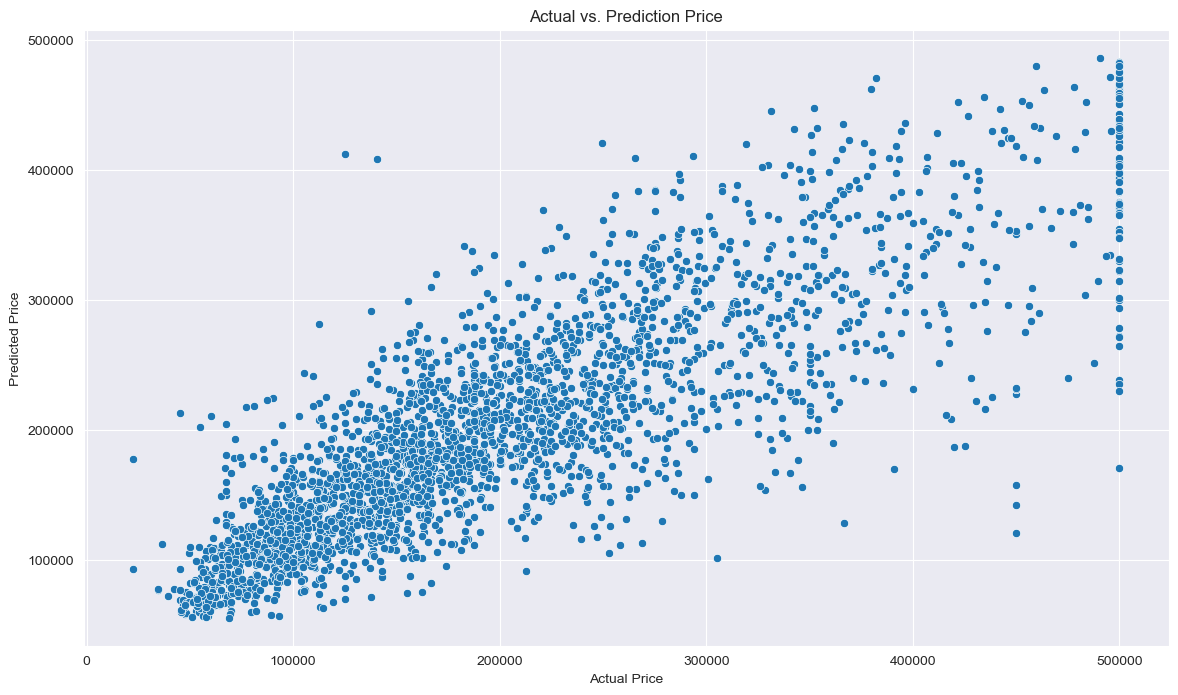

In [106]:
plt.figure(figsize=(14, 8))
plot = sns.scatterplot(x=y_test, y=y_pred_rf_tuning).set(title='Actual vs. Prediction Price', 
                                               xlabel='Actual Price', 
                                               ylabel='Predicted Price');

The scatterplot above shows the relationship between actual prices (x-axis) and predicted prices (y-axis) after hyperparameter tuning.

- **Positive Correlation**: The scatterplot reveals a strong positive correlation between the actual and predicted prices, as the points generally align along a diagonal line. This indicates that the model performs well, with predictions closely matching the actual values for a majority of the data points.

- **Spread of Points:** While the predictions are mostly accurate, there is still some spread around the diagonal, particularly at higher price ranges. This suggests that the model has larger errors when predicting more expensive houses.

- **Bounded Values at 500,000:** A notable vertical cluster appears at the 500,000 mark, indicating that the model may struggle to predict beyond a certain price threshold. This could be due to limitations in the data or the model’s ability to generalize for extreme values.

- **Improvement After Tuning:** Compared to before hyperparameter tuning, the tighter alignment of points to the diagonal line signifies improved model accuracy. The reduction in error metrics (RMSE and MAE) and the higher R² score complement this observation.

In summary, after hyperparameter tuning, the model has improved its ability to predict house prices, though some challenges remain, particularly with higher-priced houses.

**Feature Importances**

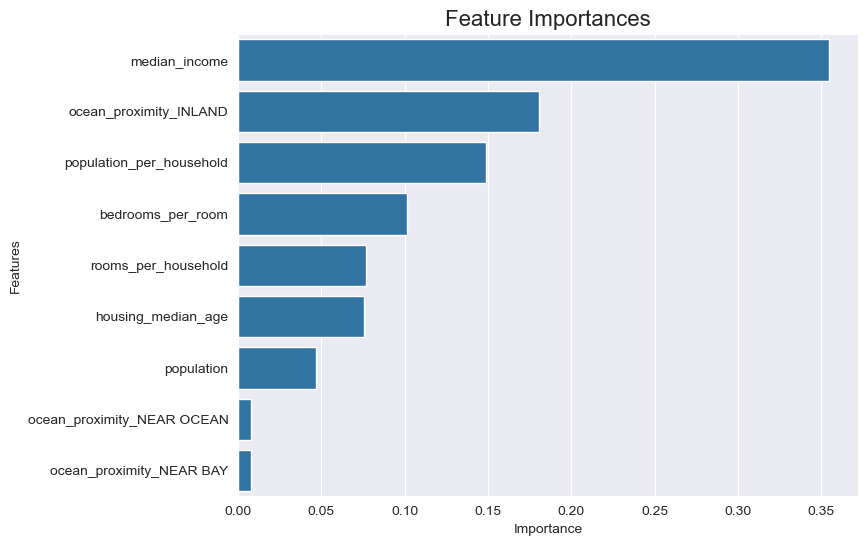

In [107]:
best_rf_model = random_search.best_estimator_.named_steps['model'] 


feature_names = preprocessor.transformers_[0][1].get_feature_names_out(input_features=['ocean_proximity'])

scaled_features = ['median_income', 'housing_median_age', 'rooms_per_household', 
                   'population_per_household', 'bedrooms_per_room', 'population']

all_feature_names = list(feature_names) + scaled_features

feature_importances = pd.DataFrame(best_rf_model.feature_importances_,
                                   index=all_feature_names, columns=['Importance']).sort_values('Importance', ascending=False)

plt.figure(figsize=(8, 6))
sns.barplot(x='Importance', y=feature_importances.index, data=feature_importances)

plt.title('Feature Importances', fontsize=16)
plt.xlabel('Importance')
plt.ylabel('Features')

plt.show()


This chart shows which features are most important for predicting house prices.

1. Median Income is the most important factor, meaning household income has the strongest impact on house prices.

2. Ocean Proximity (INLAND) is also very significant, showing that being inland affects prices a lot.

3. Population Per Household and Bedrooms Per Room also play a role, reflecting housing density.

4. Other features like Rooms Per Household, Housing Median Age, and Population are less important.

5. Ocean Proximity (NEAR OCEAN) and Ocean Proximity (NEAR BAY) have very little impact.


In summary, income and location are the key drivers of house prices in California, making them the most influential factors in determining property values.

## **Conclusion**

In this analysis of California house prices, the development and evaluation of multiple regression models were carried out to predict the median house value based on various features. Random Forest Regressor, after hyperparameter tuning, emerged as the best-performing model, significantly improving prediction accuracy. Key improvements include a reduction in RMSE and MAE, along with a substantial increase in the R² score, indicating that the model now explains a larger portion of the variance in house prices.

The analysis revealed that median income and location (especially proximity to the ocean) are the most influential factors in determining house prices. These factors have the strongest correlation with house prices and are therefore the primary drivers of property values in California. Other features, such as population per household and bedrooms per room, also play important roles, but to a lesser extent.

Overall, the model has proven effective in predicting house prices, although challenges remain in accurately predicting higher-value homes. Nonetheless, this predictive tool can significantly assist stakeholders in the real estate market, such as developers, investors, and financial institutions, by providing more accurate pricing estimates and reducing financial risks. Further improvements, including advanced feature engineering and additional model tuning, could enhance prediction performance even further.

## **Model Limitations**

1. **Difficulty in Predicting High-Value Homes**:
   - The model struggles to predict the prices of high-value homes accurately. This limitation could be due to the relatively smaller representation of high-priced properties in the training data, or the unique characteristics of these properties (such as luxury features, rare locations, or custom designs) that the model fails to fully capture.

2. **Overfitting on Certain Features**:
   - Despite hyperparameter tuning, there is a possibility that the Random Forest model may overfit to certain features (such as median income or proximity to the ocean), particularly if these features are highly correlated. Overfitting can reduce the model's ability to generalize to unseen data, affecting prediction accuracy in different market conditions or geographical locations.

3. **Assumption of Feature Independence**:
   - The Random Forest Regressor assumes that each feature contributes independently to the prediction. However, in real-world scenarios, some features might be highly interdependent (e.g., proximity to the ocean and median income). The model might not fully capture these complex relationships unless explicitly modeled with interaction features.

4. **Limited Data Representation for Specific Regions**:
   - The dataset may not represent all geographical regions equally, especially rural areas or locations with limited housing data. This could lead to poor generalization for properties in less-represented areas or regions that have different housing market dynamics.

5. **Sensitivity to Data Quality**:
   - The model is highly sensitive to the quality of the data, such as missing values, noise, and outliers. While preprocessing techniques like removing outliers helped, any incomplete or inaccurate data in the training set could lead to biased predictions, especially in areas with sparse or inconsistent data.

6. **Potential Bias in Model Predictions**:
   - If the training data has inherent biases (e.g., location-based biases, socioeconomic biases), these biases could be reflected in the model’s predictions. This could result in inaccurate or unfair price predictions, particularly for homes in underrepresented neighborhoods or minority communities.

7. **Limited Model Interpretability**:
   - Although Random Forest provides feature importance insights, it remains a black-box model. Understanding the specific reasons behind certain predictions (e.g., why a house in one location is priced higher than one in a different area) might be challenging, limiting its usability for stakeholders who need transparent and actionable insights.

8. **Inability to Account for Macro-Economic Factors**:
   - The model does not incorporate broader macroeconomic factors such as interest rates, inflation, or government policies, all of which can influence house prices. These external factors, while not part of the dataset, could have a significant impact on property values and need to be considered in any real-world application.

9. **Potential Lack of Real-Time Adaptability**:
   - The model might not adapt quickly to sudden shifts in the housing market (e.g., during a market crash or a sudden rise in demand due to external events). This lack of real-time adaptability could reduce its effectiveness in dynamic market conditions unless the model is regularly retrained with fresh data.

10. **Limited Performance on Smaller or Specialized Housing Markets**:
    - For niche housing markets or properties that are outliers (such as historic homes or properties in extremely high-demand areas), the model might not perform as well. The generalization ability is constrained by the patterns in the training data, and the model might struggle to capture the unique pricing factors of these specialized properties.

Despite these limitations, the Random Forest model remains a powerful tool for house price prediction. Addressing these challenges through improvements in data quality, model tuning, and the inclusion of additional features or models could help mitigate some of these limitations.


## **Business Recommendations**

1. **Improved Pricing Strategy**:
   - Use the Random Forest model to optimize pricing strategies by predicting house prices more accurately. This will help real estate companies set competitive prices based on various factors, ensuring they stay ahead in a competitive market. Accurate pricing can prevent overpricing or underpricing, both of which can negatively impact sales.

2. **Targeted Marketing**:
   - Utilize the model's price predictions to segment the market effectively. Real estate agents can focus on specific customer groups (e.g., first-time homebuyers, investors, or luxury buyers) with tailored marketing campaigns. This targeted approach can lead to higher engagement, better customer satisfaction, and improved sales conversions.

3. **Investment Opportunities**:
   - Investors can leverage the model's predictions to identify high-growth areas with rising property values. By pinpointing these locations early, investors can make smarter decisions about where to buy properties, leading to potentially higher returns on investment. The model can help in identifying regions that are undervalued but have the potential for future growth.

4. **Enhanced Property Valuation**:
   - Real estate professionals can use the model to offer more accurate property valuations, reducing human error and bias in the valuation process. By providing better service to both buyers and sellers, the model can ensure that property prices reflect true market conditions, improving trust and satisfaction among clients.

5. **Forecasting Market Trends**:
   - By analyzing future price predictions generated by the model, businesses can prepare for market fluctuations. This foresight enables real estate companies to adjust their strategies accordingly—such as entering or exiting certain markets at the right time. The model can act as a forecasting tool, helping businesses stay proactive in a dynamic market.


****

## **Save Model**

In [108]:
import pickle

# Create a pipeline with the RandomForestRegressor
estimator = Pipeline([('preprocess', preprocessor), ('model', RandomForestRegressor())])

# Fit the model on the training data
estimator.fit(X_train, y_train)

# Save the model to a file using pickle
pickle.dump(estimator, open('Model_RandomForest.sav', 'wb'))


In [110]:
# Load the saved model from file
filename = 'Model_RandomForest.sav'
loaded_model = pickle.load(open(filename, 'rb'))

# Make predictions and evaluate the model
from sklearn.metrics import mean_squared_error
import numpy as np

# Calculate RMSE on the test set
rmse = np.sqrt(mean_squared_error(y_test, loaded_model.predict(X_test)))